In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests
import json
import datetime as dt
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Resources/cities.csv"
cities_df= pd.read_csv(output_data_file)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
cities_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold response info
lat = []
lng = []
temp = []
humidity = []
cloud = []
date = []
place_city = []
place_country =[]
temp_min = []
temp_max = []
wind_speed= []
y=1

# Check to see the URL works
response= requests.get(query_url + city)
print(response)


places_data = response.json()
print(json.dumps(places_data, indent=4, sort_keys=True))


<Response [200]>
{
    "base": "stations",
    "clouds": {
        "all": 12
    },
    "cod": 200,
    "coord": {
        "lat": -9.8,
        "lon": -139.03
    },
    "dt": 1584220721,
    "id": 4020109,
    "main": {
        "feels_like": 83.93,
        "grnd_level": 1011,
        "humidity": 78,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 81.45,
        "temp_max": 81.45,
        "temp_min": 81.45
    },
    "name": "Atuona",
    "rain": {
        "3h": 0.44
    },
    "sys": {
        "country": "PF",
        "sunrise": 1584199217,
        "sunset": 1584243004
    },
    "timezone": -34200,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 50,
        "speed": 12.86
    }
}


In [5]:
# #Define function for date
# date=[]
# for city in date:
#     date_test=city
#     date_conversion=time.gmtime(date_test)
#     date_format=time.strftime('%m/%d/%Y',date_conversion)
#     dates.append(date_format)

In [6]:
# Beginning of the log:
print("Beginning Data Retrieval")
print("-------------------------")

# Loop through the list of cities and perform a request for data on each. Add to log

for city in cities:
    target_url = query_url + city
    response = requests.get(target_url).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        temp_max.append(response['main']['temp_max'])
        temp_min.append(response['main']['temp_min'])
        date.append(response['dt'])
        place_city.append(city)
        place_country.append(response['sys']['country'])
        print (f"Processing Record {y} | {city} ")
    except KeyError:
        print(f"City not found. Skipping...")
        y=y-1
        pass
    y+=1
# End of Data log:
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")




# # use iterrows to iterate through pandas dataframe
# for index, row in types_df.iterrows():

#     # get restaurant type from df
#     restr_type = row['ethnicity']

#     # add keyword to params dict
#     params['keyword'] = restr_type

#     # assemble url and make API request
#     print(f"Retrieving Results for Index {index}: {restr_type}.")
#     response = requests.get(base_url, params=params).json()
    
#     # extract results
#     results = response['results']
    
#     try:
#         print(f"Closest {restr_type} restaurant is {results[0]['name']}.")
        
#         types_df.loc[index, 'name'] = results[0]['name']
#         types_df.loc[index, 'address'] = results[0]['vicinity']
#         types_df.loc[index, 'price_level'] = results[0]['price_level']
#         types_df.loc[index, 'rating'] = results[0]['rating']
        
#     except (KeyError, IndexError):
#         print("Missing field/result... skipping.")
        
#     print("------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 | onguday 
Processing Record 2 | ushuaia 
City not found. Skipping...
Processing Record 3 | atuona 
City not found. Skipping...
Processing Record 4 | portland 
Processing Record 5 | bhag 
Processing Record 6 | bonavista 
Processing Record 7 | hervey bay 
Processing Record 8 | esperance 
City not found. Skipping...
Processing Record 9 | hobart 
Processing Record 10 | sakaiminato 
Processing Record 11 | skeldon 
Processing Record 12 | kloulklubed 
Processing Record 13 | jasper 
Processing Record 14 | okhotsk 
Processing Record 15 | aasiaat 
Processing Record 16 | saint-philippe 
Processing Record 17 | san cristobal 
Processing Record 18 | vardo 
Processing Record 19 | avarua 
Processing Record 20 | cherskiy 
Processing Record 21 | bilma 
Processing Record 22 | sulangan 
Processing Record 23 | lebu 
Processing Record 24 | mahebourg 
Processing Record 25 | hilo 
Processing Record 26 | mackay 
Processing Record 27 | kava

Processing Record 223 | arraial do cabo 
Processing Record 224 | marsh harbour 
Processing Record 225 | kodiak 
Processing Record 226 | bubaque 
Processing Record 227 | beringovskiy 
Processing Record 228 | brownsville 
City not found. Skipping...
Processing Record 229 | panguna 
Processing Record 230 | morros 
Processing Record 231 | kunya 
Processing Record 232 | sokoni 
Processing Record 233 | popondetta 
Processing Record 234 | general salgado 
Processing Record 235 | aberdeen 
Processing Record 236 | fier 
Processing Record 237 | namatanai 
Processing Record 238 | kautokeino 
Processing Record 239 | oranjemund 
Processing Record 240 | puerto escondido 
Processing Record 241 | cabo san lucas 
Processing Record 242 | dubai 
Processing Record 243 | katsina 
Processing Record 244 | aklavik 
Processing Record 245 | gore 
Processing Record 246 | hithadhoo 
Processing Record 247 | turbat 
Processing Record 248 | trinidad 
Processing Record 249 | erzin 
City not found. Skipping...
Process

Processing Record 440 | tonj 
Processing Record 441 | avera 
Processing Record 442 | moindou 
Processing Record 443 | bandarbeyla 
Processing Record 444 | gigmoto 
Processing Record 445 | altusried 
Processing Record 446 | necochea 
Processing Record 447 | kannangad 
Processing Record 448 | saint-avold 
Processing Record 449 | gondanglegi 
Processing Record 450 | gerede 
Processing Record 451 | buala 
Processing Record 452 | honggang 
Processing Record 453 | ambon 
Processing Record 454 | maniitsoq 
Processing Record 455 | chara 
Processing Record 456 | xalpatlahuac 
Processing Record 457 | fort nelson 
Processing Record 458 | saint-paul 
Processing Record 459 | puri 
Processing Record 460 | hearst 
Processing Record 461 | phuket 
Processing Record 462 | kon tum 
Processing Record 463 | half moon bay 
Processing Record 464 | tupsan 
Processing Record 465 | kruisfontein 
Processing Record 466 | luwingu 
Processing Record 467 | warren 
Processing Record 468 | karratha 
Processing Record 

# Convert Raw Data to DataFrame

- Export the city data into a .csv.
- Display the DataFrame

In [7]:
#Create a Dataframe
weather_df= {"City": place_city, 
             "Cloudiness": cloud, 
             "Country": place_country, 
             "Date": date, 
             "Humidity": humidity, 
             "Lat": lat,
             "Lng": lng,
             "Max Temp": temp_max, 
             "Wind Speed": wind_speed}
weather_df= pd.DataFrame(weather_df)
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,onguday,100,RU,1584220721,90,50.75,86.15,15.75,9.75
1,ushuaia,20,AR,1584220721,47,-54.80,-68.30,57.20,3.36
2,atuona,12,PF,1584220721,78,-9.80,-139.03,81.45,12.86
3,portland,75,US,1584220686,65,45.52,-122.68,43.00,21.92
4,bhag,14,PK,1584220722,31,29.04,67.82,70.11,5.41


# Plotting the Data

- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

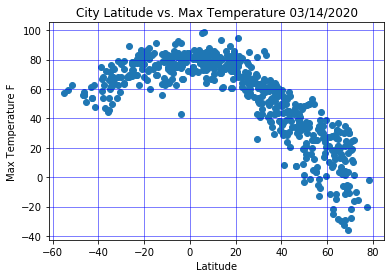

In [10]:
# Plot the  scatter plot 
plt.scatter(lat, temp_max)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature F")
plt.title(("City Latitude vs. Max Temperature") + " " + pd.datetime.now().strftime("%m/%d/%Y"))
           
plt.grid(linestyle='-', linewidth='0.5', color='blue')


plt.savefig('../Output/latitude_maxtemp.png')



## Latitude vs. Humidity Plot

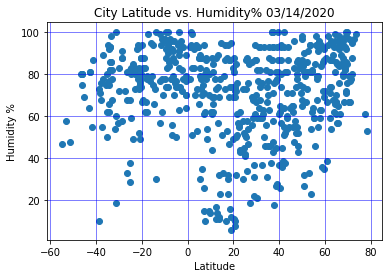

In [27]:
# Plot the  scatter plot 
plt.scatter(lat, humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(("City Latitude vs. Humidity%") + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.grid(linestyle='-', linewidth='0.5', color='blue')


plt.savefig('../Output/latitude_humidity.png')

##  Latitude vs. Cloudiness Plot

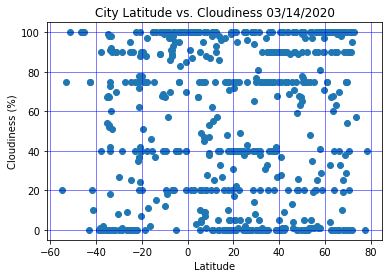

In [32]:
# Plot the  scatter plot 
plt.scatter(lat, cloud)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(("City Latitude vs. Cloudiness") + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.grid(linestyle='-', linewidth='0.5', color='blue')


plt.savefig('../Output/latitude_cloud.png')

##  Latitude vs. Wind Speed Plot

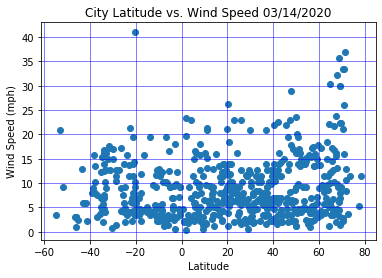

In [33]:
# Plot the  scatter plot 
plt.scatter(lat, wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(("City Latitude vs. Wind Speed") + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.grid(linestyle='-', linewidth='0.5', color='blue')


plt.savefig('../Output/latitude_wind.png')

# Linear Regression

In [14]:
# Add another dataframe for the Northern Hemisphere
northern_df= weather_df.loc[weather_df["Lat"]>= 0]
northern_lat= northern_df["Lat"]
northern_temp= northern_df["Max Temp"]
northern_hum=northern_df["Humidity"]
northern_wind=northern_df["Wind Speed"]
northern_cloud=northern_df["Cloudiness"]
northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,onguday,100,RU,1584220721,90,50.75,86.15,15.75,9.75
3,portland,75,US,1584220686,65,45.52,-122.68,43.00,21.92
4,bhag,14,PK,1584220722,31,29.04,67.82,70.11,5.41
5,bonavista,68,CA,1584220722,83,48.65,-53.11,36.00,17.00
9,sakaiminato,75,JP,1584220723,93,35.55,133.23,37.40,6.93
...,...,...,...,...,...,...,...,...,...
574,kiruna,100,SE,1584220825,79,67.86,20.23,21.20,32.21
575,gaogou,0,CN,1584220825,56,34.02,119.19,40.95,8.32
577,najran,40,SA,1584220826,32,17.49,44.13,80.60,5.82
579,asmar,0,AF,1584220616,46,35.03,71.36,38.43,7.76


In [15]:
# Add another dataframe for the Southern Hemisphere
southern_df= weather_df.loc[weather_df["Lat"]< 0]
southern_lat= southern_df["Lat"]
southern_temp=southern_df["Max Temp"]
southern_hum=southern_df["Humidity"]
southern_wind=southern_df["Wind Speed"]
southern_cloud=southern_df["Cloudiness"]
southern_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,ushuaia,20,AR,1584220721,47,-54.80,-68.30,57.20,3.36
2,atuona,12,PF,1584220721,78,-9.80,-139.03,81.45,12.86
6,hervey bay,90,AU,1584220723,82,-25.30,152.85,73.00,5.82
7,esperance,40,AU,1584220723,93,-33.87,121.90,64.40,13.87
8,hobart,75,AU,1584220715,81,-42.88,147.33,54.00,5.82
...,...,...,...,...,...,...,...,...,...
570,cocal,0,BR,1584220824,58,-28.62,-49.35,78.75,1.28
573,stawell,0,AU,1584220825,89,-37.05,142.77,47.25,7.52
576,trairi,100,BR,1584220825,95,-3.28,-39.27,75.87,2.48
578,maldonado,68,UY,1584220826,94,-34.67,-54.92,71.60,4.70


## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.7912


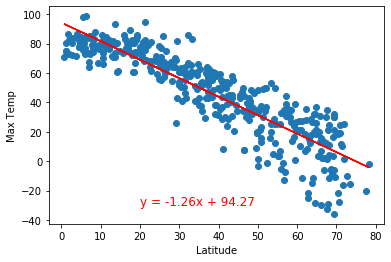

<Figure size 432x288 with 0 Axes>

In [35]:
# Perform a linear regression on latitude and Temperature
slope, int, r, p, std_err = linregress(northern_lat, northern_temp)
      
# Create equation of line to calculate latitude
fit = slope * northern_lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(northern_lat, northern_temp)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(northern_lat,fit,"r-")
plt.annotate(line_eq,(20,-30),fontsize=12,color="red")



# Caculate r coefficient
corr = round(r*r,4)
print(f'The r-squared is {corr}')


fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('../Output/northlatitude_maxtemp.png', dpi=50)

##  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.3625


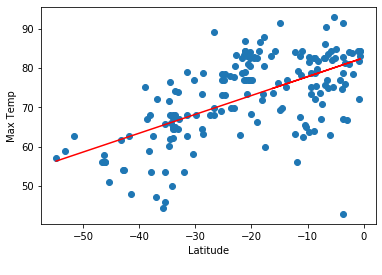

<Figure size 432x288 with 0 Axes>

In [36]:
# Perform a linear regression on latitude and Temperature
slope, int, r, p, std_err = linregress(southern_lat, southern_temp)
      
# Create equation of line to calculate latitude
fit = slope * southern_lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(southern_lat, southern_temp)

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(southern_lat,fit,"r-")
plt.annotate(line_eq,(-45,30),fontsize=12,color="red")

# Caculate r coefficient
corr = round(r*r,4)
print(f'The r-squared is {corr}')


fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig('../Output/southlatitude_maxtemp.png', dpi=50)

## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.0688


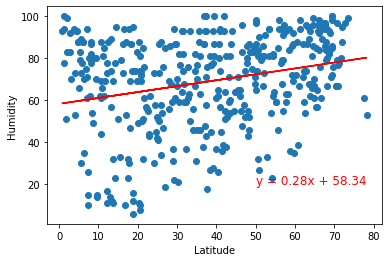

<Figure size 432x288 with 0 Axes>

In [37]:
# Perform a linear regression on latitude and Humidity
slope, int, r, p, std_err = linregress(northern_lat, northern_hum)
      
# Create equation of line to calculate latitude
fit = slope * northern_lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(northern_lat, northern_hum)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(northern_lat,fit,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")



# Caculate r coefficient
corr = round(r*r,4)
print(f'The r-squared is {corr}')

fig3 = plt.gcf()
plt.show()
plt.draw()
fig3.savefig('../Output/northlatitude_humidity.png', dpi=50)

## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.0691


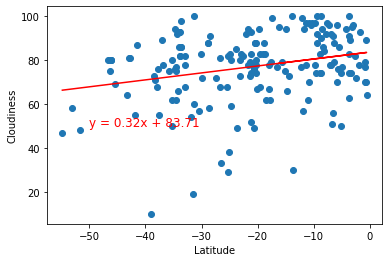

<Figure size 432x288 with 0 Axes>

In [38]:
# Perform a linear regression on latitude and Humidity
slope, int, r, p, std_err = linregress(southern_lat, southern_hum)
      
# Create equation of line to calculate latitude
fit = slope * southern_lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(southern_lat, southern_hum)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(southern_lat,fit,"r-")
plt.annotate(line_eq,(-50,50),fontsize=12,color="red")

# Caculate r coefficient
corr = round(r*r,4)
print(f'The r-squared is {corr}')


fig4 = plt.gcf()
plt.show()
plt.draw()
fig4.savefig('../Output/southlatitude_humidity.png', dpi=50)

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0294


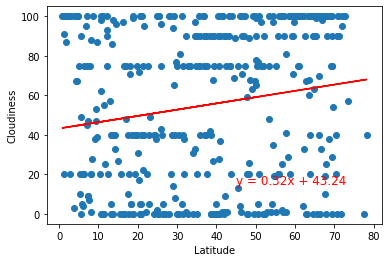

<Figure size 432x288 with 0 Axes>

In [39]:
# Perform a linear regression on latitude and Cloudiness
slope, int, r, p, std_err = linregress(northern_lat, northern_cloud)
      
# Create equation of line to calculate latitude
fit = slope * northern_lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(northern_lat, northern_cloud)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(northern_lat,fit,"r-")
plt.annotate(line_eq,(45,15),fontsize=12,color="red")



# Caculate r coefficient
corr = round(r*r,4)
print(f'The r-squared is {corr}')

fig5 = plt.gcf()
plt.show()
plt.draw()
fig5.savefig('../Output/northlatitude_cloudiness.png', dpi=50)

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0642


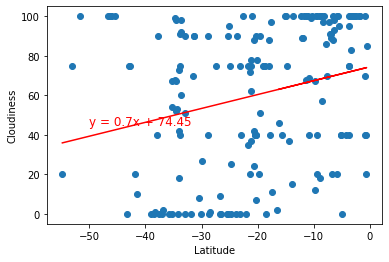

<Figure size 432x288 with 0 Axes>

In [40]:
# Perform a linear regression on latitude and Cloudiness
slope, int, r, p, std_err = linregress(southern_lat, southern_cloud)
      
# Create equation of line to calculate latitude
fit = slope * southern_lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(southern_lat, southern_cloud)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(southern_lat,fit,"r-")
plt.annotate(line_eq,(-50,45),fontsize=12,color="red")

# Caculate r coefficient
corr = round(r*r,4)
print(f'The r-squared is {corr}')


fig6 = plt.gcf()
plt.show()
plt.draw()
fig6.savefig('../Output/southlatitude_cloudiness.png', dpi= 50)

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.0415


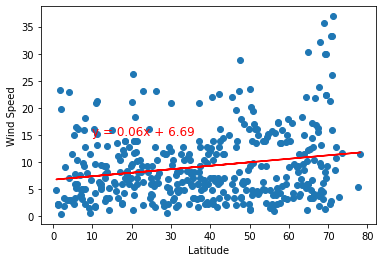

<Figure size 432x288 with 0 Axes>

In [41]:
# Perform a linear regression on latitude and Wind Speed
slope, int, r, p, std_err = linregress(northern_lat, northern_wind)
      
# Create equation of line to calculate latitude
fit = slope * northern_lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(northern_lat, northern_wind)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(northern_lat,fit,"r-")
plt.annotate(line_eq,(10,15),fontsize=12,color="red")



# Caculate r coefficient
corr = round(r*r,4)
print(f'The r-squared is {corr}')

fig7 = plt.gcf()
plt.show()
plt.draw()
fig7.savefig('../Output/northlatitude_wind.png', dpi= 50)

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.0174


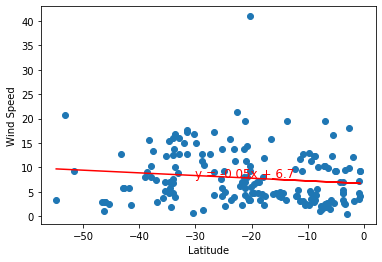

<Figure size 432x288 with 0 Axes>

In [43]:
# Perform a linear regression on latitude and Wind Speed
slope, int, r, p, std_err = linregress(southern_lat, southern_wind)
      
# Create equation of line to calculate latitude
fit = slope * southern_lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(southern_lat, southern_wind)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(southern_lat,fit,"r-")
plt.annotate(line_eq,(-30,8),fontsize=12,color="red")

# Caculate r coefficient
corr = round(r*r,4)
print(f'The r-squared is {corr}')


fig8 = plt.gcf()
plt.show()
plt.draw()
fig8.savefig('../Output/southlatitude_wind.png', dpi= 50)